## Visualize Top 10 Covid-19 Daily New Cases for the Past 60 Days

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

countries = 10
window = 60
font_size = 14

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')


df['Country/Region'] = df['Country/Region'].str.cat(df['Province/State'], sep=' ', na_rep='')
df['Country/Region'] = df['Country/Region'].str.rstrip(' ')
df.index = df['Country/Region']
df = df.drop(['Lat', 'Long', 'Province/State', 'Country/Region'], axis=1)
df = df.diff(periods=1, axis=1)
df = df.rolling(7, axis=1).mean()
last_date = df.columns[-1]
df = df.sort_values([last_date], ascending=False)
df = df.T
df = df[df.columns[:countries]]
df.tail(5)

Country/Region,"Korea, South",Germany,France,Vietnam,Italy,United Kingdom,Japan,US,Thailand,Brazil
4/2/22,294053.571429,206584.714286,137039.142857,113817.857143,69527.857143,75107.285714,45757.571429,28954.857143,26072.857143,22353.142857
4/3/22,285478.857143,207150.142857,135909.428571,115265.000000,68727.428571,75107.285714,46328.428571,27991.142857,26109.571429,21863.571429
4/4/22,273853.285714,197507.142857,136333.142857,84599.428571,68694.428571,64880.857143,46370.857143,25890.142857,26025.285714,22530.857143
4/5/22,254098.285714,189370.714286,135034.142857,76507.285714,67068.428571,60590.571429,46544.714286,26646.000000,22398.285714,22154.428571
4/6/22,240396.285714,210547.428571,132468.857143,72601.428571,66850.428571,55506.714286,46709.285714,27098.857143,25651.571429,21212.857143


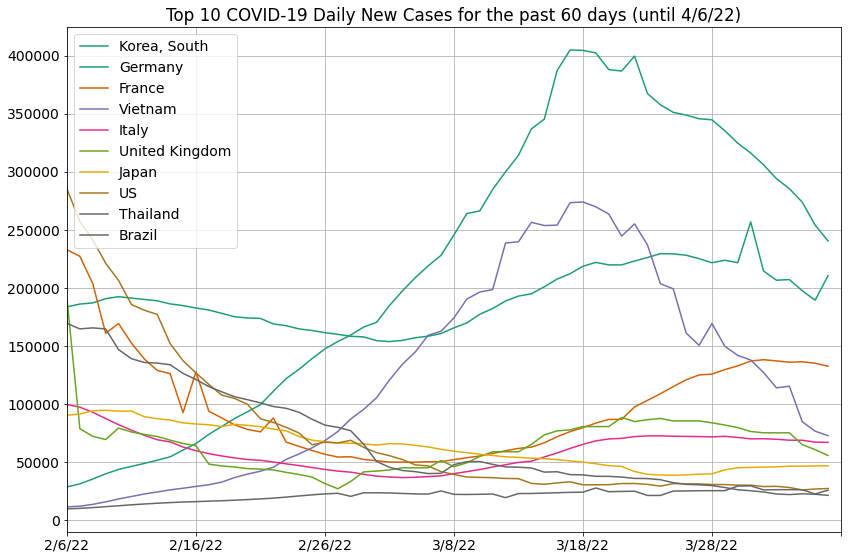

In [3]:
plt.rcParams['font.size'] = font_size
df[-window:].plot(figsize=(12, 8), fontsize=font_size, grid=True, colormap='Dark2', 
                  title=f'Top {countries} COVID-19 Daily New Cases for the past {window} days (until {last_date})')
plt.xlim([0, window])
plt.legend(fontsize=font_size)
plt.tight_layout()
plt.show()